<a href="https://colab.research.google.com/github/tanay47/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Mobile-Price-Range-Prediction </u></b>

## <b> Problem Description </b>

### The smartphone industry has been steadily developing and growing, both in terms of market size and models. Globally, 40% of the world's population is predicted to own a smartphone. According to Ericsson, the number of smartphone subscriptions worldwide surpasses six billion and is expected to grow by several hundred million in the next few years further. China, India, and United States are the countries with the highest number of smartphone users.
### In this massively booming market it becomes very important to fix a price for a new model any company decides to launch. The price should not only maximize profits for company, but also justify the tag in competing market.
### Our goal here is to build a Classification ML model to predict the justified rank of price range for new models to launch.

## <b> Data Description </b>

* ### Battery_power - Total energy a battery can store in one time measured in mAh
* ### Blue - Has bluetooth or not
* ### Clock_speed - speed at which microprocessor executes instructions
* ### Dual_sim - Has dual sim support or not
* ### Fc - Front Camera mega pixels
* ### Four_g - Has 4G or not
* ### Int_memory - Internal Memory in Gigabytes
* ### M_dep - Mobile Depth in cm
* ### Mobile_wt - Weight of mobile phone
* ### N_cores - Number of cores of processor
* ### Pc - Primary Camera mega pixels
* ### Px_height - Pixel Resolution Height
* ### Px_width - Pixel Resolution Width
* ### Ram - Random Access Memory in Mega Bytes
* ### Sc_h - Screen Height of mobile in cm
* ### Sc_w - Screen Width of mobile in cm
* ### Talk_time - longest time that a single battery charge will last when you are
* ### Three_g - Has 3G or not
* ### Touch_screen - Has touch screen or not
* ### Wifi - Has wifi or not
* ### Price_range - This is the target variable with value of 0(low cost),(medium cost), 2(high cost) and 3(very high cost).

# Alright, let's start with our analysis.
###Let's start with importing relevant libraries.

# Importing relevant libraries and preliminary checks.

In [1]:
# importing all necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# scaling, splitting, cross-validation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV

# feture extraction
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import chi2

# classification models
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, make_scorer, f1_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# mount on colab for data importing.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load and store dataset to a varible.
mob_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module 4/New classification/Copy of data_mobile_price_range.csv")

In [4]:
mob_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


###Our data is mounted and ready to be operated. Let's check basic information of our dataset first.

In [5]:
# checking size of dataset
print(mob_df.size)

42000


In [6]:
# checking shape of dataset
mob_df.shape

(2000, 21)

In [7]:
# basic information of dataset
mob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### So, we have total of "2000" observations and "21" columns. Also, we do not have any null values in our dataset.

###Let's analyze  description of continuous variables of our set.

In [8]:
mob_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Here we have a general overview of all numerical features and we can already make rough estimations over it. Like means of different fetures, their quartiles and more.

In [9]:
# check for duplicated observations.
len(mob_df[mob_df.duplicated()])

0

### Great, we also don't have any duplicate observations as well.

In [10]:
mob_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### This concludes basic overview on the dataset. Now, We will analyse this dataset in detail and prepare it thoroughly to pass it on to different models as required.

# Exploratory Data Analysis and Preprocessing.

### Identify categorical and continuous variables

In [11]:
# checking unique values of dataset.
unique_count = mob_df.nunique()
unique_count

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

### Here we can obseerve our categorical features

In [12]:
# Categorical features list.
mob_cat_list = ['blue', 'dual_sim', 'four_g', 'n_cores', 'sc_h', 'sc_w', 'three_g', 'touch_screen', 'wifi']

### Let's check dist of target variable

Text(0.5, 1.0, "Distribution of 'price_range' ")

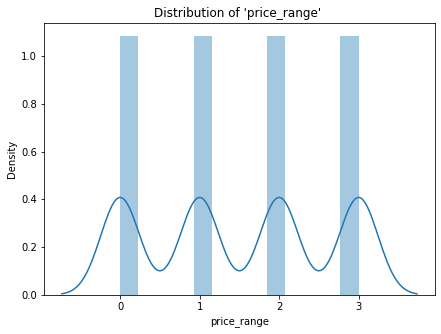

In [13]:
# distribution of target variable.
plt.figure(figsize=(7,5))
sns.distplot(mob_df['price_range'])
plt.title(f"Distribution of 'price_range' ")

### We have mobile prices in 4 different ranges. 
### Also, a very balanced dataset.

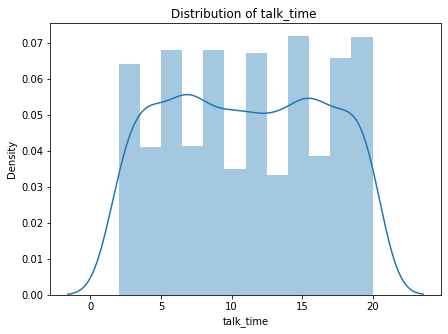

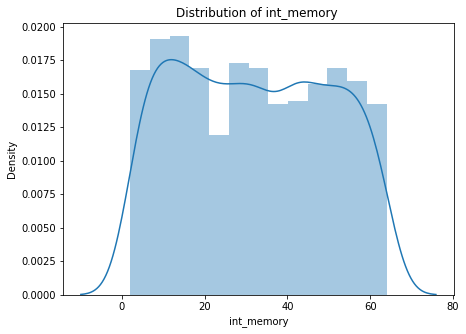

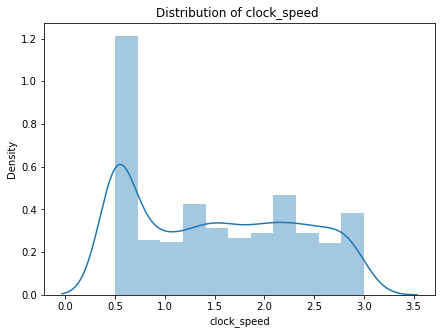

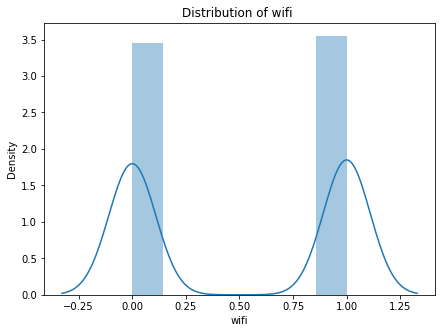

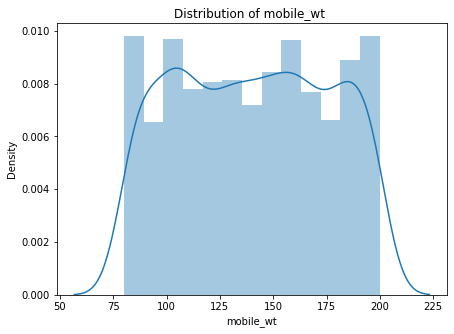

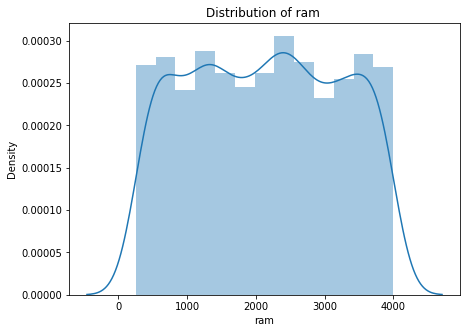

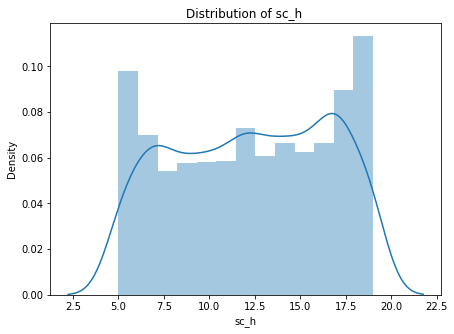

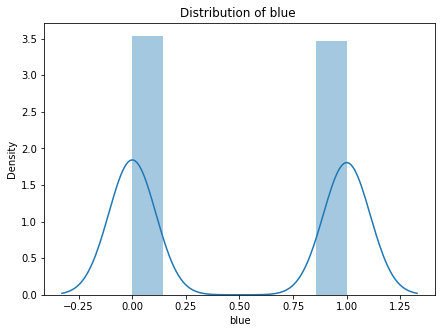

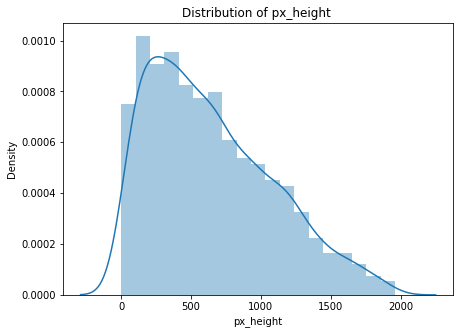

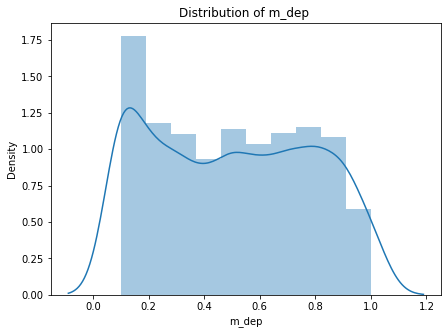

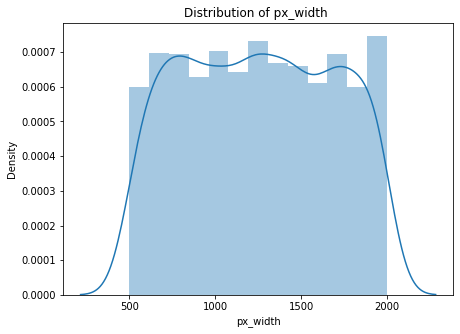

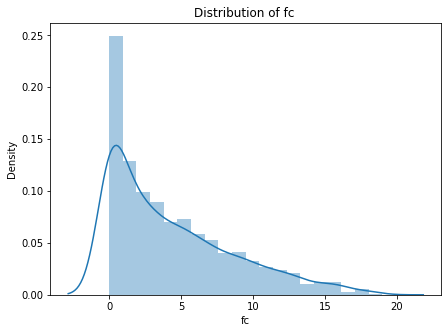

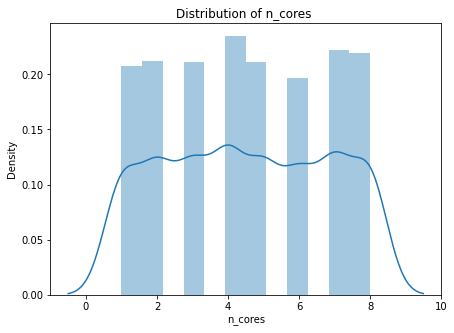

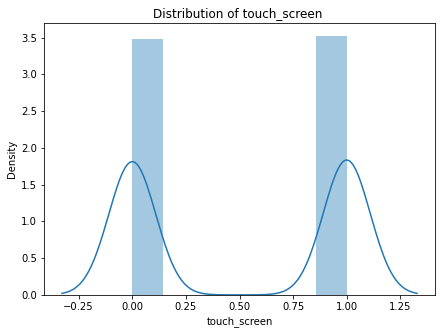

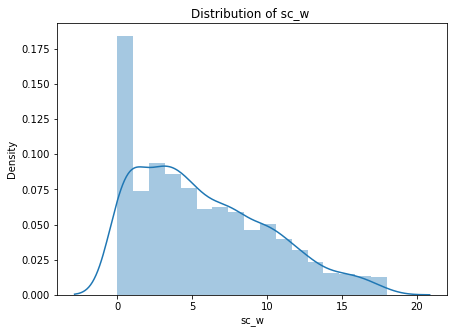

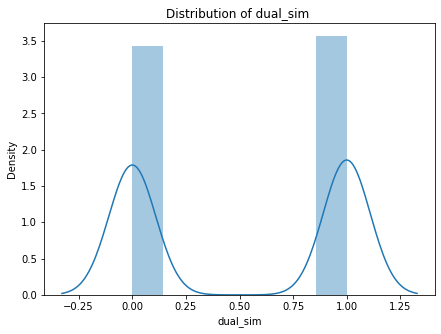

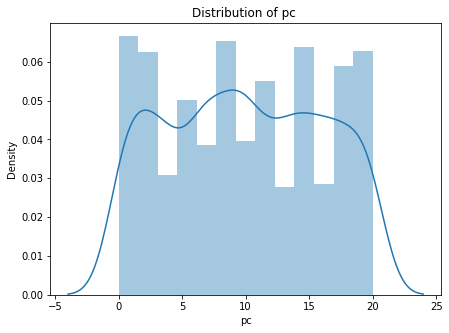

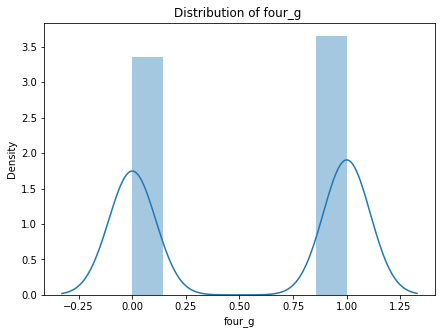

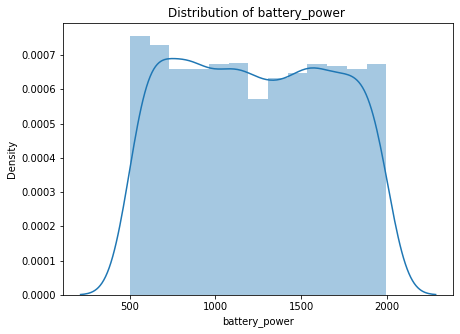

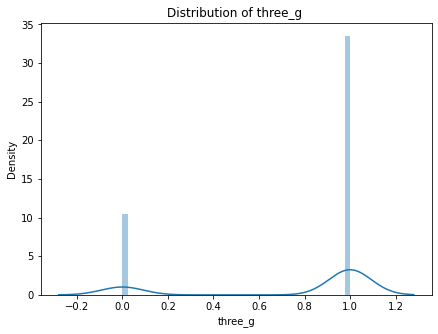

In [14]:
# distribution of all features.
for fet in list( set(mob_df.columns) - {"price_range"}) :
  plt.figure(figsize=(7,5))
  sns.distplot(mob_df[fet])
  plt.title(f"Distribution of {fet} ")

### Let's compare features to our target variable.

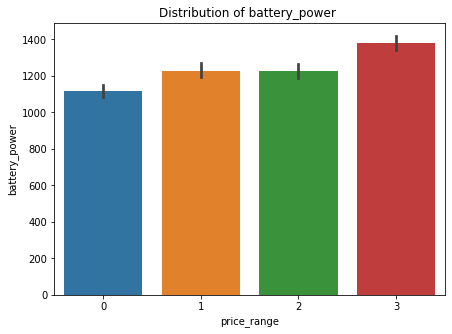

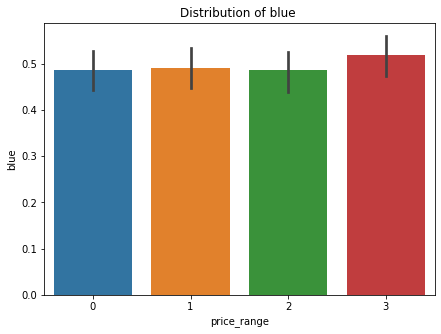

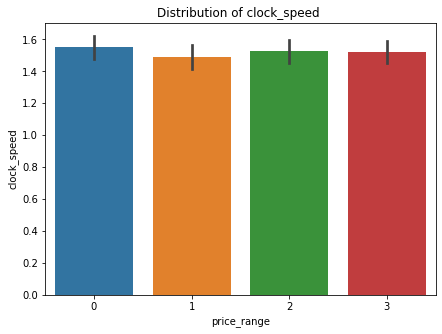

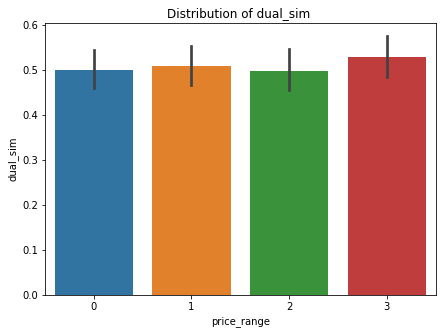

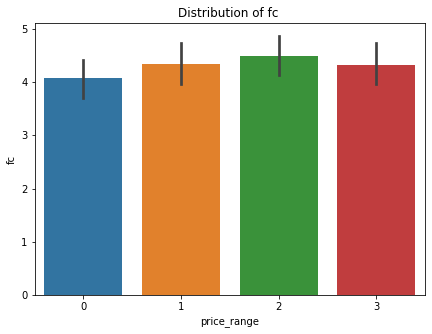

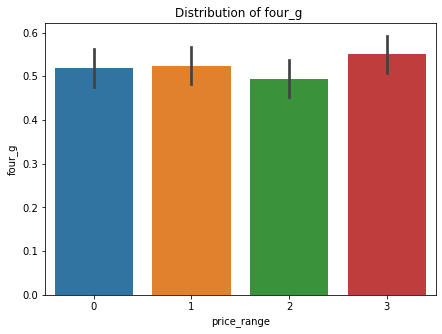

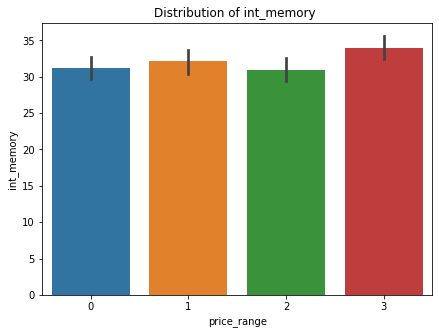

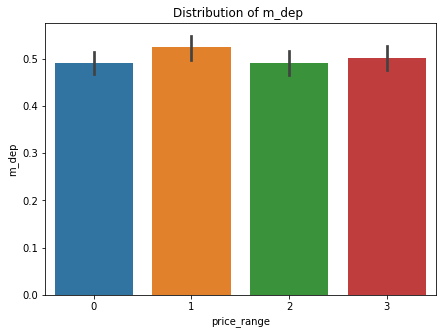

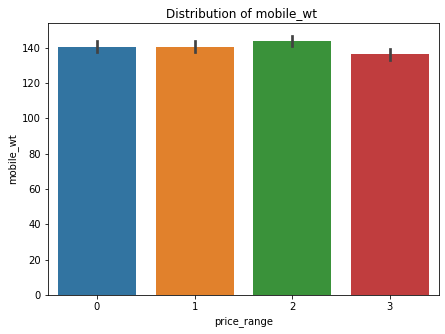

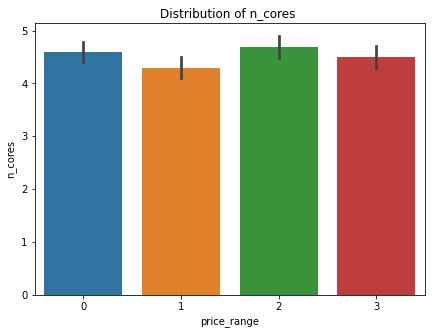

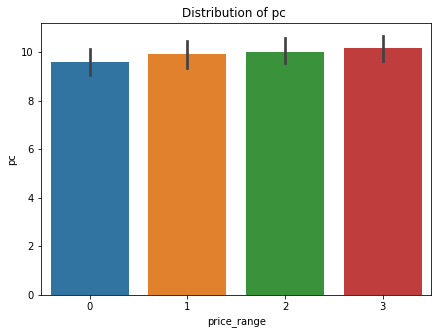

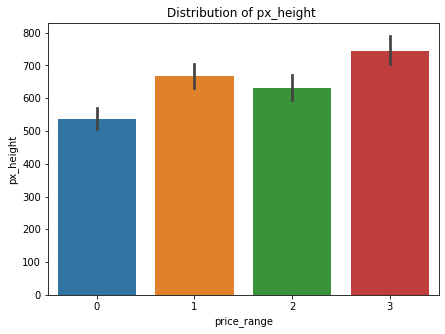

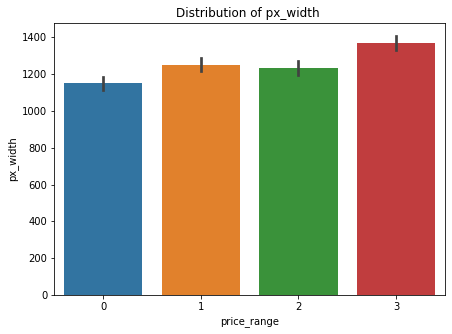

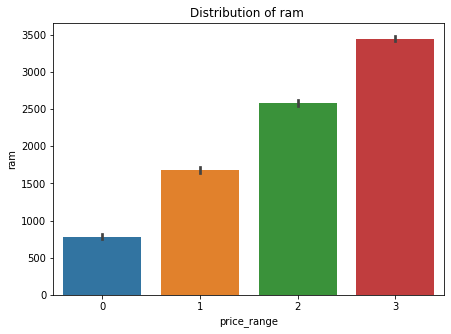

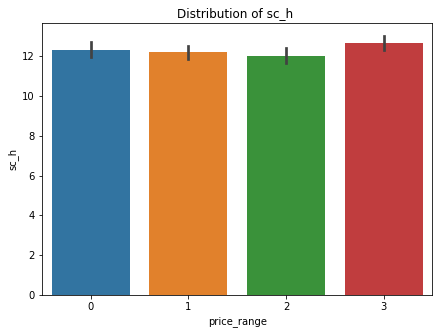

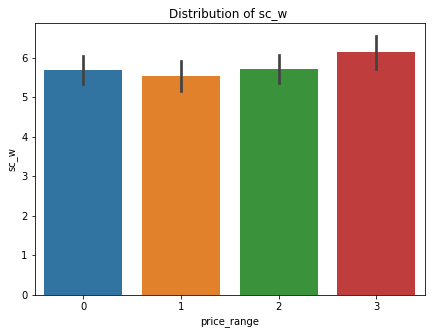

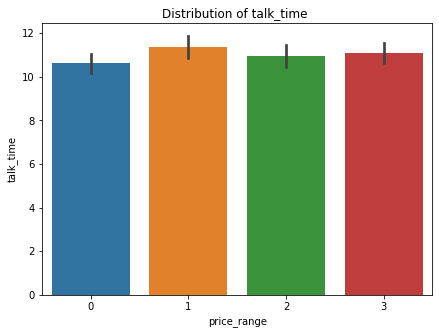

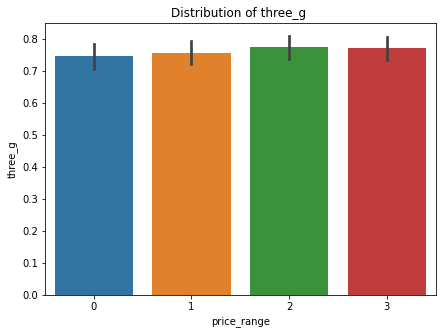

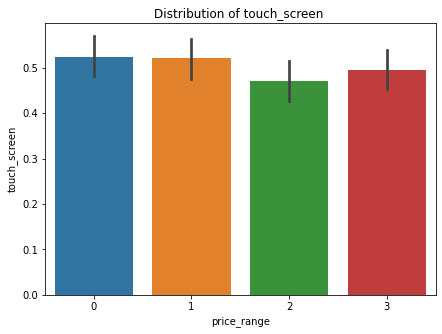

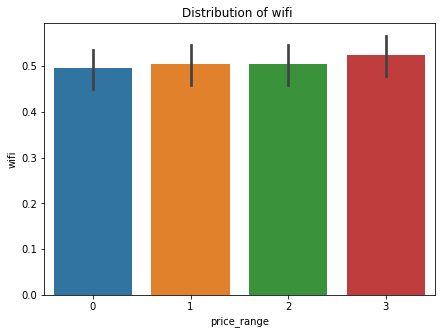

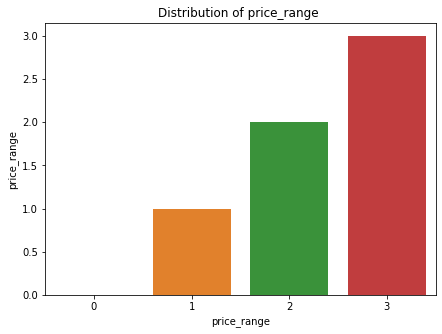

In [15]:
# using bar plot to compare.
for fet in mob_df.columns :
  plt.figure(figsize=(7,5))
  sns.barplot(mob_df["price_range"], mob_df[fet] )
  plt.title(f"Distribution of {fet} ")

### From plots ablove we can clearly see "Ram" and "Pixel Size" are the prominet features affecting price range.

### Check for outliers

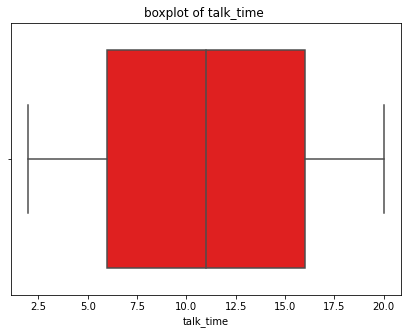

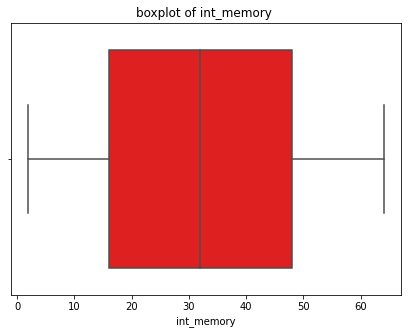

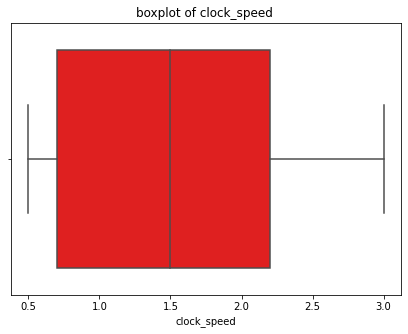

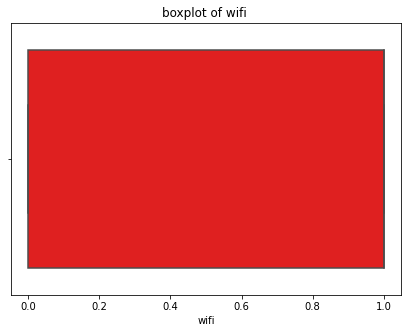

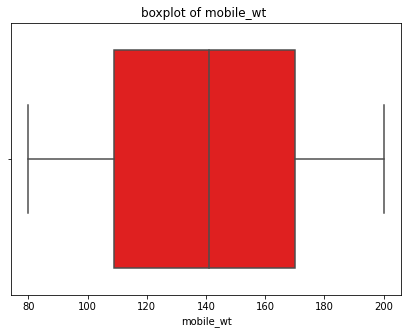

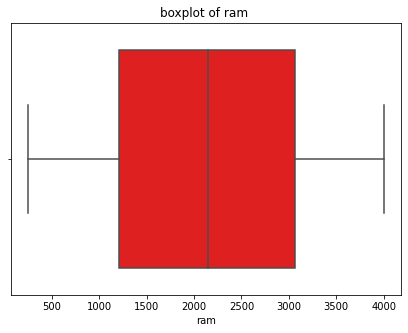

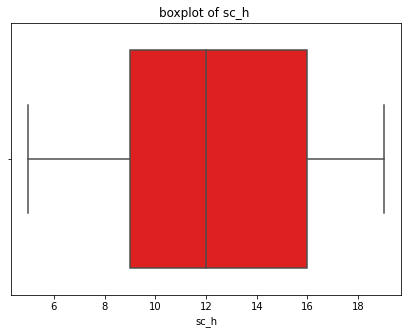

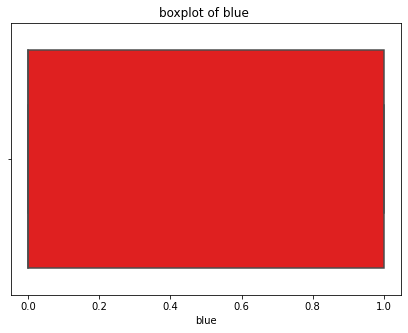

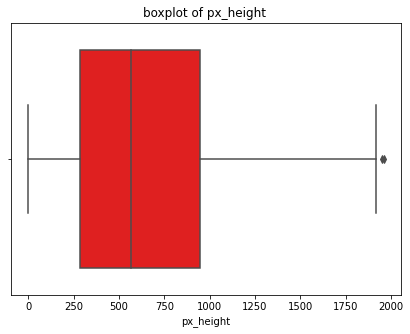

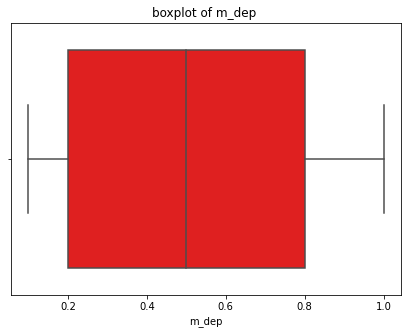

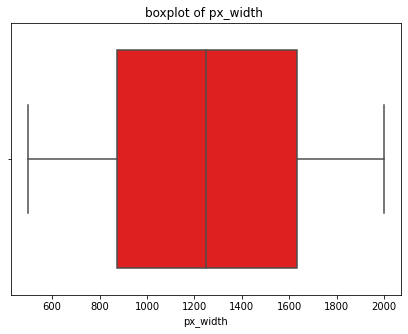

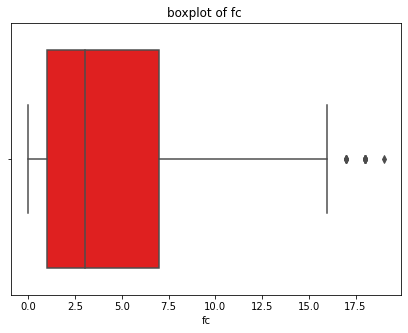

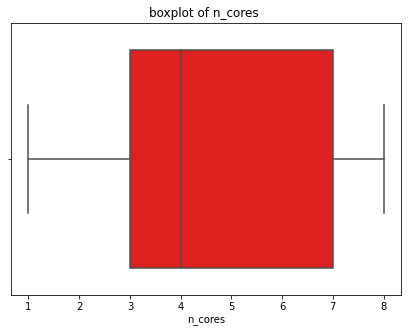

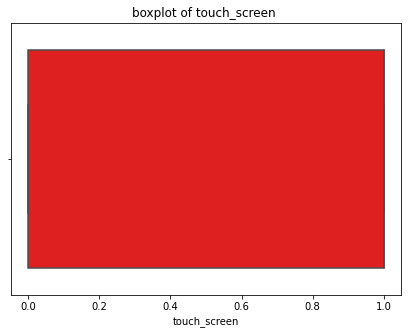

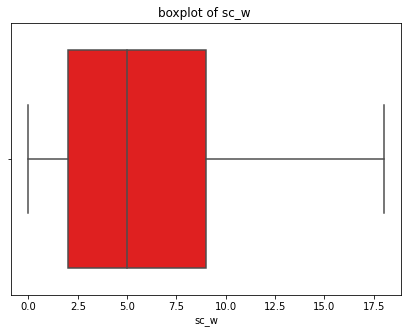

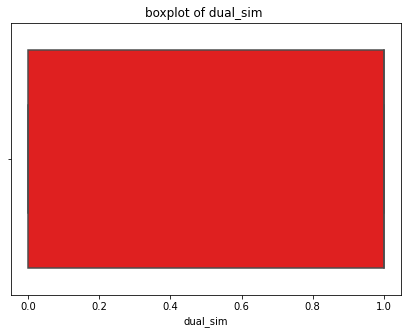

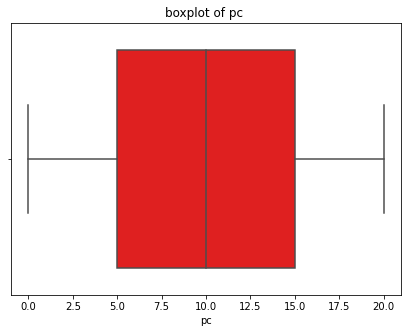

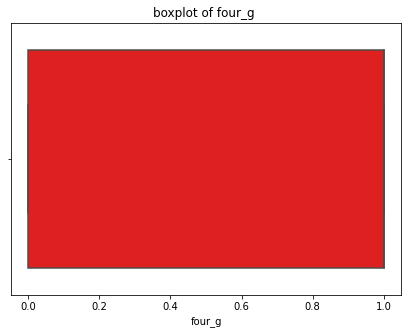

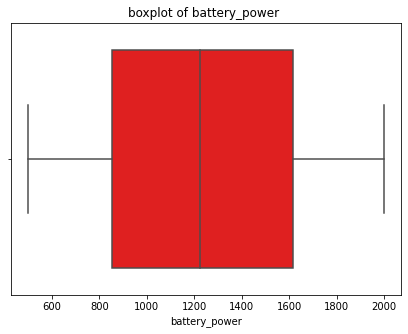

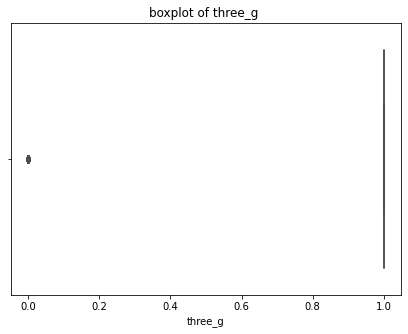

In [16]:
# boxplot of all features.
for fet in list( set(mob_df.columns) - {"price_range"}) :
  plt.figure(figsize=(7,5))
  sns.boxplot(mob_df[fet], color="r")
  plt.title(f"boxplot of {fet} ")

### Our dataset is fairly clean from outliers. We have very few of them which won't disturb our analysis.
### Also every variable is numeric with already encoded categorical variables.

## Feature Engineering and importance.
### First we will drop those features which are definitely not required.

In [17]:
mob_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### We will add new feature "px_area" which will be combination of "px_width" and "px_height".
### Also, "sc_area" will be added in place of "sc_h" and "sc_w".

In [18]:
# dimensionality reduction.
mob_df["px_area"] = mob_df['px_width'] * mob_df['px_height']
mob_df["sc_area"] = mob_df['sc_h'] * mob_df['sc_w']

### We are ready to drop useless columns.

In [19]:
# dropping irrelevant columns.
mob_df.drop(['px_width', 'px_height', 'sc_h', 'sc_w'], axis=1, inplace=True)

In [20]:
# check if dropped or not
mob_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'three_g', 'touch_screen', 'wifi', 'price_range', 'px_area', 'sc_area'],
      dtype='object')

### Implementing Extra Tree Classifier for feature selection.

In [21]:
# Dependent and independent splitting
feture_extrac_x=mob_df.drop(['price_range'], axis=1)
feture_extrac_y=mob_df['price_range']

In [22]:
# fit ETC model
model = ExtraTreesClassifier()
model.fit(feture_extrac_x, feture_extrac_y)
print(model.feature_importances_)

[0.06753881 0.02005565 0.03737671 0.02054282 0.03689253 0.01598624
 0.03911029 0.03636572 0.04065515 0.03653746 0.03757107 0.41816509
 0.03867762 0.01370831 0.01837576 0.02111051 0.06248462 0.03884563]


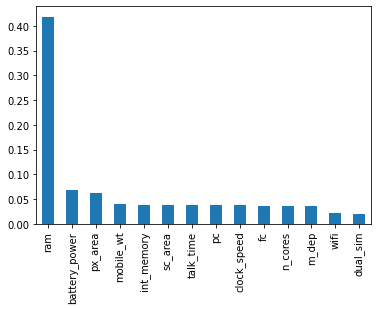

In [23]:
# plotting impotant features according to ETC
feat_importances_XTC = pd.Series(model.feature_importances_, index=feture_extrac_x.columns)
feat_importances_XTC.nlargest(14).plot.bar()
plt.show()

### Well, as we saw earlier. "ram" is most prominent feature for prediction. But, this method of feature selection don't help too much.
### Let's implement chi-Sq method and see if it helps.

### Implementing Chi-Squ for feature selection.

In [24]:
# applying chi-2 for feture selection.
chi_imp_fet = chi2(feture_extrac_x,feture_extrac_y)

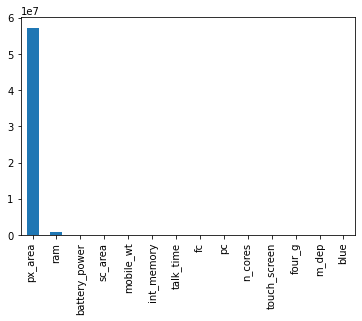

In [25]:
# plotting important features according to chi-Squ
feat_importances_chi2 = pd.Series(chi_imp_fet[0], index=feture_extrac_x.columns)
feat_importances_chi2.nlargest(14).plot.bar()
plt.show()

### More questions than answers.
### No problem, We'll be using every variable instead.